In [1]:
library(tm)
library(wordcloud)
library(SnowballC)

Loading required package: NLP
Loading required package: RColorBrewer


In [2]:
fl <- read.csv('rd/WC',sep = "\t")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”

In [3]:
cld <- Corpus(VectorSource(fl$X..))

In [4]:
cld <- tm_map(cld, content_transformer(tolower))
cld <- tm_map(cld, removeNumbers)
cld <- tm_map(cld, removeWords, stopwords("english"))
cld <- tm_map(cld, removeWords, c("https", "http")) 
cld <- tm_map(cld, removePunctuation)
cld <- tm_map(cld, stripWhitespace)

In [5]:
a1 <- TermDocumentMatrix(cld)
a2 <- as.matrix(a1)
a3 <- sort(rowSums(a2),decreasing=TRUE)
a4 <- data.frame(word = names(a3),freq=a3)

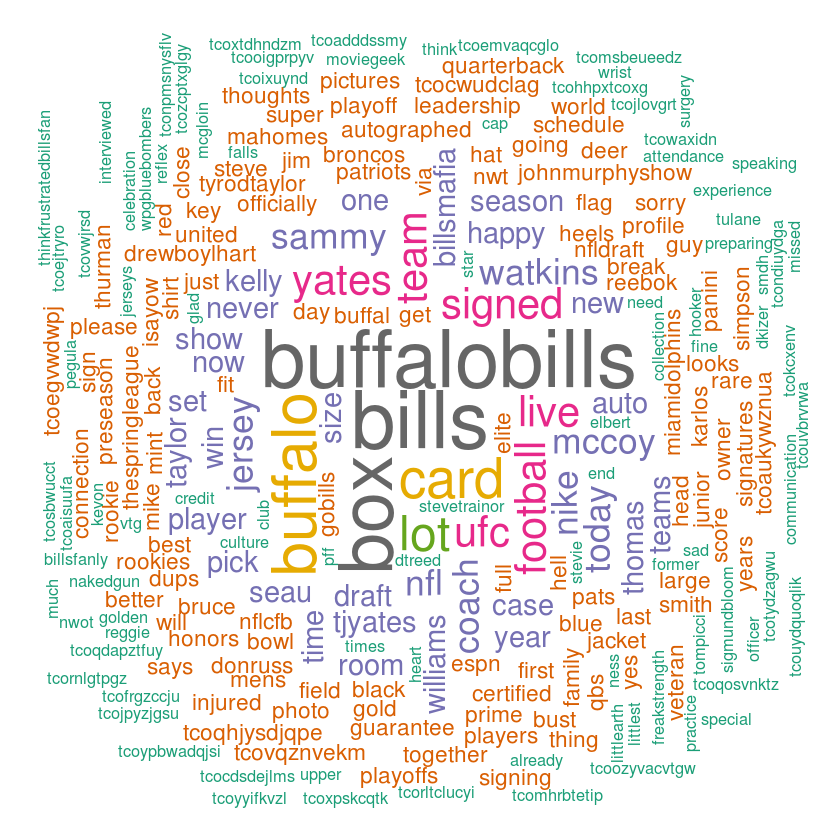

In [6]:
set.seed(1234)
wordcloud(words = a4$word, freq = a4$freq, min.freq = 1,
          max.words=250, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))